In [1]:
import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\kaggle-survey-2019\multiple_choice_responses.csv
./kaggle/input\kaggle-survey-2019\other_text_responses.csv
./kaggle/input\kaggle-survey-2019\questions_only.csv
./kaggle/input\kaggle-survey-2019\survey_schema.csv
./kaggle/input\kaggle-survey-2020\kaggle_survey_2020_responses.csv
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_answer_choices.pdf
./kaggle/input\kaggle-survey-2020\supplementary_data\kaggle_survey_2020_methodology.pdf
./kaggle/input\kaggle-survey-2021\kaggle_survey_2021_responses.csv
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_answer_choices.pdf
./kaggle/input\kaggle-survey-2021\supplementary_data\kaggle_survey_2021_methodology.pdf


In [2]:
# 2021년 설문조사 데이터
import pandas as pd
import numpy as np

df = pd.read_csv("./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df.head()

C:\Users\1qlqj\AppData\Local\Temp\ipykernel_21488\2117951780.py:5: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
questions = df.iloc[0, :]
questions

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q38_B_Part_8                           In the next 2 years, do you hope to become mor...
Q38_B_Part_9                           In the next 2 years, do you hope to become mor...
Q38_B_Part_10                          In the next 2 years, do you hope to become mor...
Q38_B_Part_11                          In the next 2 years, do you hope to become mor...
Q38_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 369,

In [4]:
df = df.iloc[1:, :].reset_index(drop=True)

In [5]:
temp = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})

temp

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


## express 방식
- 막대 그래프 그리기

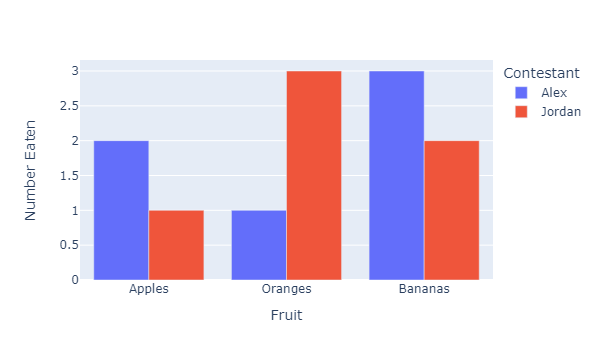

In [12]:
import plotly.express as px
fig = px.bar(temp, x = 'Fruit', y = 'Number Eaten', color = 'Contestant', barmode='group')  
fig.show()

In [14]:
long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


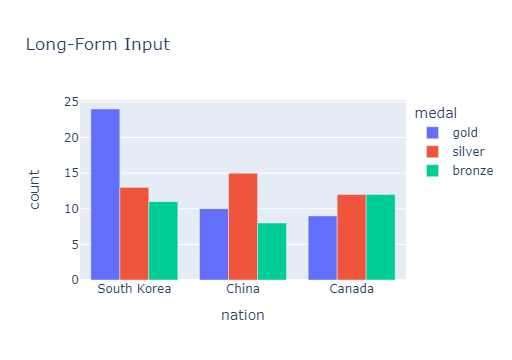

In [25]:
fig = px.bar(long_df, x = 'nation', y = 'count', 
             color = 'medal',  
             barmode ='group',
             title = 'Long-Form Input')  # barmode
fig.show()

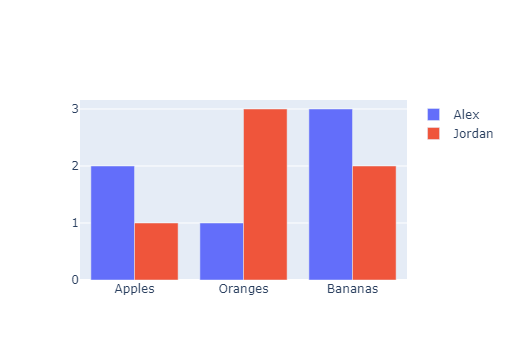

In [27]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(name = "Alex", x = temp['Fruit'], y = temp[temp['Contestant'] == "Alex"]['Number Eaten'].values))
fig.add_trace(go.Bar(name = "Jordan", x = temp['Fruit'], y = temp[temp['Contestant'] == "Jordan"]['Number Eaten'].values))
fig.update_layout(barmode='group')
fig.show()

In [28]:
fig.show('json')

## 응답자의 연령대 시각화

In [39]:
df['Q1'].value_counts()

Q1
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: count, dtype: int64

## Q1 막대 그래프
- 위 결괏값을 q1_df 저장

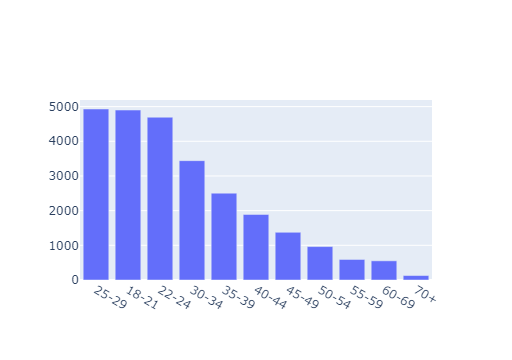

In [41]:
q1_df = df['Q1'].value_counts()

fig = go.Figure()
fig.add_trace(
    # 시각화 종류
    go.Bar(x=q1_df.index, y=q1_df.values))

fig.show()

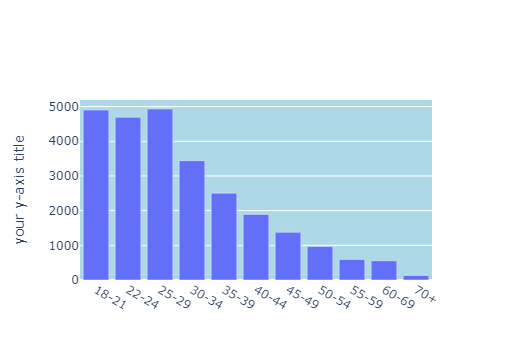

In [51]:
q1_df = df['Q1'].value_counts()

CATEGORY_ORDER = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-69", "70+"]

fig = go.Figure()
fig.add_trace(
    # 시각화 종류
    go.Bar(x=q1_df.index, y=q1_df.values))

# 시각화 스타일을 변경
fig.update_layout(
    xaxis = dict(categoryorder = 'array', categoryarray = CATEGORY_ORDER),
    yaxis = dict(title = 'your y-axis title'),
    plot_bgcolor = 'lightblue')

fig.show()

In [55]:
df['Q2'].value_counts()

Q2
Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64

In [56]:
q1_q2_df = df.loc[:, ["Q1", "Q2"]].replace({'Prefer not to say':'etc', 'Nonbinary':"etc", "Prefer to self-describe": "etc"})
q1_q2_df['Q2'].value_counts()

Q2
Man      20598
Woman     4890
etc        485
Name: count, dtype: int64

In [74]:
q1_q2_df = q1_q2_df.groupby(['Q2', 'Q1']).size().reset_index().rename(columns = {0: "Count"})
q1_q2_df.tail()

,Q2,Q1,Count
28,etc,45-49,29
29,etc,50-54,17
30,etc,55-59,11
31,etc,60-69,14
32,etc,70+,10


Man
--------------------------------------------------
Woman
--------------------------------------------------
etc
--------------------------------------------------


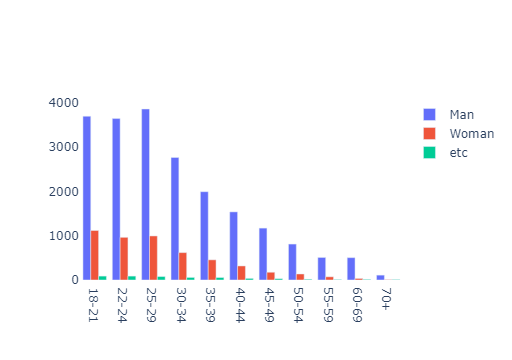

In [109]:
fig = go.Figure()
for gender, group in q1_q2_df.groupby("Q2"):
    print(gender)
    fig.add_trace(go.Bar(x = group['Q1'], y = group['Count'], name = gender))
    print('-'*50)
    
fig.update_layout(plot_bgcolor = 'white')

fig.show()

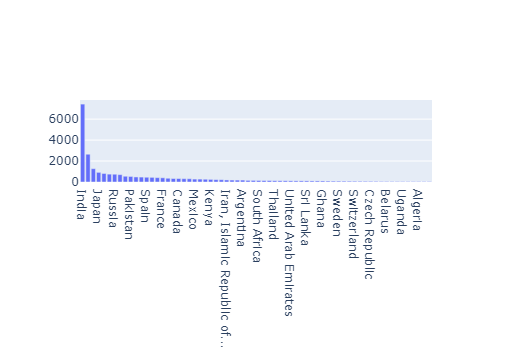

In [110]:
q3_df = df['Q3'].value_counts()

fig = go.Figure()
fig.add_trace(go.Bar(x = q3_df.index, y = q3_df.values))
fig.show()

In [111]:
q3_q25 = df.loc[:, ['Q3', 'Q25']]
q3_q25.head(1)

,Q3,Q25
0,India,"25,000-29,999"


In [112]:
q3_q25.tail(5)

,Q3,Q25
25968,Egypt,"15,000-19,999"
25969,China,NaN
25970,Sweden,$0-999
25971,United States of America,NaN
25972,India,$0-999


In [113]:
q3_q25['Q25'].value_counts()

q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'].value_counts()[0]

4338

In [114]:
q3_q25['Q25'] = q3_q25['Q25'].replace(['$0-999', '1,000-1,999'], '$0-1,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['2,000-2,999', '3,000-3,999'], '$2,000-3,999')
q3_q25['Q25'] = q3_q25['Q25'].replace(['4,000-4,999', '5,000-7,499'], '$4,000-7,499')
q3_q25['Q25'] = q3_q25['Q25'].replace(['25,000-29,999', '60,000-69,999',  
                       '30,000-39,999','15,000-19,999', '70,000-79,999', 
                       '10,000-14,999', '20,000-24,999', '7,500-9,999', 
                       '100,000-124,999', '40,000-49,999', '50,000-59,999', 
                       '300,000-499,999', '200,000-249,999', '125,000-149,999', 
                       '250,000-299,999', '80,000-89,999', '90,000-99,999', 
                       '150,000-199,999', '>$1,000,000', '$500,000-999,999'], '$7,500+')

q3_q25['Q25'].value_counts()

Q25
$7,500+         8943
$0-1,999        4338
$4,000-7,499    1155
$2,000-3,999     955
Name: count, dtype: int64

In [115]:
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 0 to 25972
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      25973 non-null  object
 1   Q25     15391 non-null  object
dtypes: object(2)
memory usage: 406.0+ KB


In [116]:
q3_q25 = q3_q25.dropna(subset=['Q25'])  # 결측치 삭제
q3_q25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15391 entries, 0 to 25972
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q3      15391 non-null  object
 1   Q25     15391 non-null  object
dtypes: object(2)
memory usage: 360.7+ KB


In [117]:
q3_q25 = q3_q25.groupby(['Q3','Q25']).size().reset_index().rename(columns = {0:"Count"})
q3_q25

,Q3,Q25,Count
0,Algeria,"$0-1,999",14
1,Algeria,"$2,000-3,999",1
2,Algeria,"$4,000-7,499",3
3,Algeria,"$7,500+",5
4,Argentina,"$0-1,999",34
...,...,...,...
254,United States of America,"$7,500+",1669
255,Viet Nam,"$0-1,999",86
256,Viet Nam,"$2,000-3,999",15
257,Viet Nam,"$4,000-7,499",15


In [123]:
india_df = q3_q25.loc[q3_q25['Q3'] == 'India', :].reset_index(drop=True)
india_df['Percentage'] = (india_df['Count'] / india_df['Count'].sum()) 
india_df

,Q3,Q25,Count,Percentage
0,India,"$0-1,999",1214,0.359597
1,India,"$2,000-3,999",239,0.070794
2,India,"$4,000-7,499",451,0.133590
3,India,"$7,500+",1472,0.436019


In [122]:
usa_df = q3_q25.loc[q3_q25['Q3'] == 'United States of America', :].reset_index(drop=True)
usa_df['Percentage'] = (usa_df['Count'] / usa_df['Count'].sum()) 
usa_df

,Q3,Q25,Count,Percentage
0,United States of America,"$0-1,999",140,0.075881
1,United States of America,"$2,000-3,999",19,0.010298
2,United States of America,"$4,000-7,499",17,0.009214
3,United States of America,"$7,500+",1669,0.904607


In [124]:
india_df['%'] = np.round(india_df['Percentage']*100, 1)
usa_df['%'] = np.round(usa_df['Percentage']*100, 1)

In [126]:
india_df

,Q3,Q25,Count,Percentage,%
0,India,"$0-1,999",1214,0.359597,36.0
1,India,"$2,000-3,999",239,0.070794,7.1
2,India,"$4,000-7,499",451,0.133590,13.4
3,India,"$7,500+",1472,0.436019,43.6


In [127]:
usa_df

,Q3,Q25,Count,Percentage,%
0,United States of America,"$0-1,999",140,0.075881,7.6
1,United States of America,"$2,000-3,999",19,0.010298,1.0
2,United States of America,"$4,000-7,499",17,0.009214,0.9
3,United States of America,"$7,500+",1669,0.904607,90.5


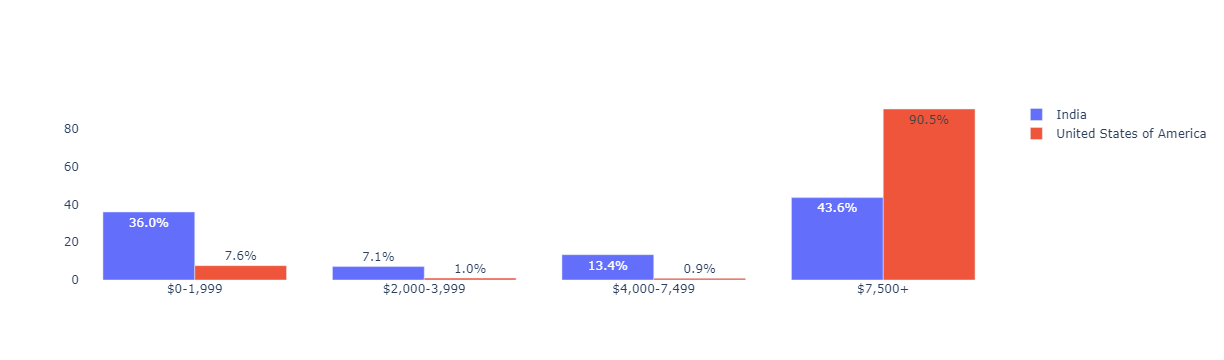

In [144]:
india_usa_df = pd.concat([india_df, usa_df]).reset_index()
fig = go.Figure()
for country, group in india_usa_df.groupby("Q3"):
   fig.add_trace(go.Bar(x = group['Q25'], 
                        y = group['%'], 
                        name = country, 
                        text = group['%'].astype(str) + "%", 
                        textposition='auto'))
fig.update_layout(barmode="group", 
                  plot_bgcolor = "white")
fig.show()